# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Functions

In [2]:
# Function to store in dictionary the number of nan values per column

def nan_counter(df):
    
    """
    Returns a dictionary containing the number of nan values per column (for dataframe df)

    Parameters
    ----------
    df : Pandas dataframe

    Returns
    -------
    remaining_nan : Dictionary
        Contains the number of nan values in each column of the dataframe

    """
    
    remaining_nan = {}

    for column in df.columns:

        remaining_nan[column] = df[column][df[column].isna() == True].size

    return remaining_nan

# Loading the data

In [3]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

# Checking the Data

In [4]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [8]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [6]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors="coerce")

In [77]:
churnData.loc[:,["SeniorCitizen", "Contract"]] = churnData.loc[:,["SeniorCitizen", "Contract"]].astype("category")

In [78]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   object  
 6   OnlineSecurity    7043 non-null   object  
 7   OnlineBackup      7043 non-null   object  
 8   DeviceProtection  7043 non-null   object  
 9   TechSupport       7043 non-null   object  
 10  StreamingTV       7043 non-null   object  
 11  StreamingMovies   7043 non-null   object  
 12  Contract          7043 non-null   category
 13  MonthlyCharges    7043 non-null   float64 
 14  TotalCharges      7043 non-null   float64 
 15  Churn             7043 non-null   object  
dtypes: category(2), float64(

In [17]:
nan_counter(churnData)

{'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'Churn': 0}

In [18]:
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(np.mean(churnData["TotalCharges"]))

In [19]:
nan_counter(churnData)

{'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 0,
 'Churn': 0}

# Logistic Regression

In [124]:
X = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]

In [125]:
y = churnData["Churn"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
X_train_num = X_train._get_numeric_data().reset_index(drop=True)
X_train_cat = X_train.select_dtypes("category").reset_index(drop=True)
X_test_num = X_test._get_numeric_data().reset_index(drop=True)
X_test_cat = X_test.select_dtypes("category").reset_index(drop=True)

In [128]:
scaler = StandardScaler()

In [129]:
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns)
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns)

In [130]:
X_train_num_scaled

,tenure,MonthlyCharges,TotalCharges
0,1.612532,0.674154,1.704560
1,-0.747907,-0.614894,-0.711711
2,1.571835,-1.335097,-0.210251
3,0.025340,0.301578,0.051750
4,0.595101,1.128231,0.989863
...,...,...,...
5629,-0.707210,1.284580,-0.329573
5630,-0.910696,0.873748,-0.583178
5631,1.042771,-1.466497,-0.485517
5632,-1.276971,0.163525,-0.977436


In [131]:
X_test_num_scaled

,tenure,MonthlyCharges,TotalCharges
0,-0.544421,-0.220695,-0.547525
1,1.124165,1.722025,2.098597
2,-0.788605,0.236709,-0.601027
3,-1.276971,-1.476477,-0.999163
4,0.920679,0.429651,0.872062
...,...,...,...
1404,-1.032788,1.144864,-0.714906
1405,-0.788605,0.782268,-0.469277
1406,0.961376,1.567339,1.820686
1407,-0.585118,-0.285563,-0.580754


In [132]:
X_train = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

In [133]:
X_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1.612532,0.674154,1.704560,0
1,-0.747907,-0.614894,-0.711711,1
2,1.571835,-1.335097,-0.210251,0
3,0.025340,0.301578,0.051750,0
4,0.595101,1.128231,0.989863,0
...,...,...,...,...
5629,-0.707210,1.284580,-0.329573,0
5630,-0.910696,0.873748,-0.583178,0
5631,1.042771,-1.466497,-0.485517,0
5632,-1.276971,0.163525,-0.977436,1


In [134]:
X_test

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,-0.544421,-0.220695,-0.547525,0
1,1.124165,1.722025,2.098597,0
2,-0.788605,0.236709,-0.601027,0
3,-1.276971,-1.476477,-0.999163,0
4,0.920679,0.429651,0.872062,0
...,...,...,...,...
1404,-1.032788,1.144864,-0.714906,1
1405,-0.788605,0.782268,-0.469277,0
1406,0.961376,1.567339,1.820686,1
1407,-0.585118,-0.285563,-0.580754,0


In [135]:
model = LogisticRegression()

In [136]:
model.fit(X_train, y_train)

LogisticRegression()

In [137]:
y_pred_train = pd.DataFrame(model.predict(X_train))
y_pred_test = pd.DataFrame(model.predict(X_test))

In [138]:
y_train

2920     No
2966     No
6099     No
5482    Yes
2012    Yes
       ... 
4931     No
3264     No
1653     No
2607    Yes
2732     No
Name: Churn, Length: 5634, dtype: object

In [139]:
y_pred_train

,0
0,No
1,No
2,No
3,No
4,No
...,...
5629,Yes
5630,Yes
5631,No
5632,Yes


In [140]:
accuracy_score(y_train, y_pred_train)
precision_score(y_train, y_pred_train, pos_label = "Yes")

0.6515580736543909

In [141]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train, pos_label = "Yes"),
                                         recall_score(y_train, y_pred_train, pos_label = "Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test, pos_label = "Yes"),
                                        recall_score(y_test, y_pred_test, pos_label = "Yes")]})

,Error_metric,Train,Test
0,Accuracy,0.790557,0.783534
1,Precision,0.651558,0.614545
2,Recall,0.459694,0.459239


Confusion matrix for the train set
[[3764  369]
 [ 811  690]]


C:\Users\ehern\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


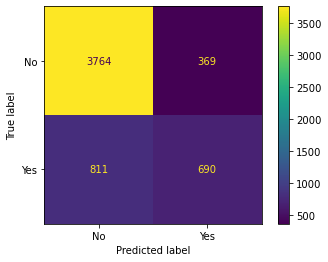



Confusion matrix for the test set
[[935 106]
 [199 169]]


C:\Users\ehern\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


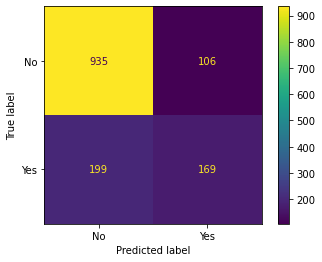

In [142]:
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model, X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
plot_confusion_matrix(model, X_test,y_test, values_format = 'd')
plt.show()